## Clusterization

datasource: https://www.kaggle.com/uciml/german-credit

author: Elvira Dzhuraeva

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('german_credit_data.csv', index_col=0)
df.head(20)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
5,35,male,1,free,NaN,NaN,9055,36,education
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,35,male,3,rent,little,moderate,6948,36,car
8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,28,male,3,own,little,moderate,5234,30,car


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB


In [4]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [5]:
chk = 'Checking account'
svgs = 'Saving accounts'

def fill_nan_colms (item):
    if (pd.isnull(item[svgs]) and pd.isnull(item[chk])):
        item[chk] = 'little'
        item[svgs] = 'little'
    elif (pd.isnull(item[svgs])):
        item[svgs] = item[chk]
    elif (pd.isnull(item[chk])):
        if(item[svgs] == 'quite rich'):
            item[chk] = 'rich'
        else:
            item[chk] = item[svgs]
    return item

df = df.apply(fill_nan_colms, axis=1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,little,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,little,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [6]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

In [7]:
df['Saving accounts'].value_counts()

little        731
moderate      148
quite rich     63
rich           58
Name: Saving accounts, dtype: int64

In [8]:
df['Checking account'].value_counts()

little      564
moderate    308
rich        128
Name: Checking account, dtype: int64

In [9]:
continuous = ['Age', 'Credit amount', 'Duration']

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df.drop(continuous, axis=1).columns:
    df[column] = labelencoder.fit_transform(df[column])


In [11]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,1,0,0,1169,6,5
1,22,0,2,1,0,1,5951,48,5
2,49,1,1,1,0,0,2096,12,3
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c821ef0>,
      dtype=object)

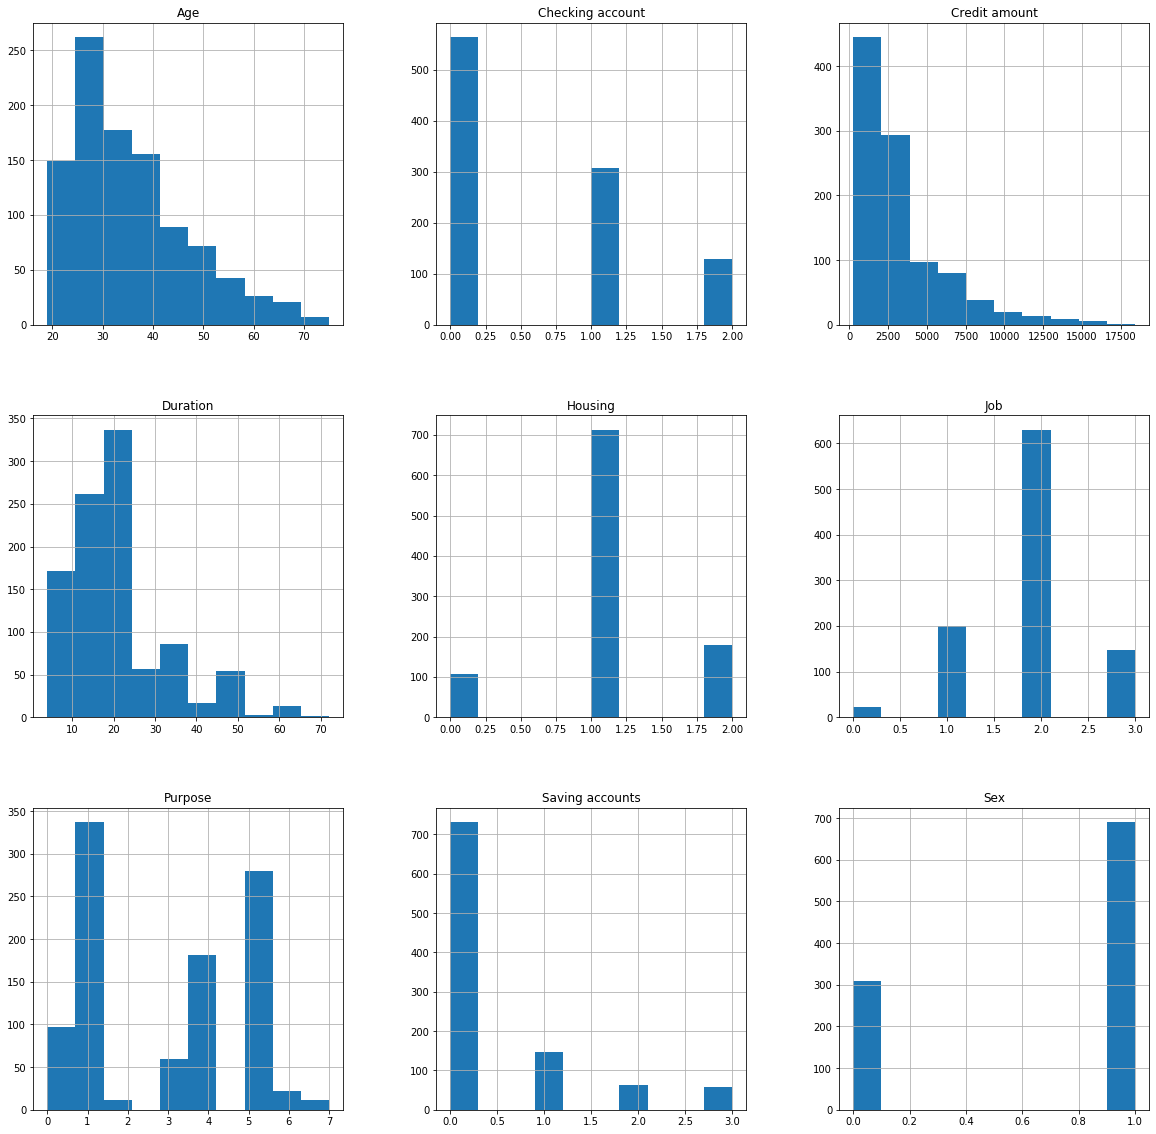

In [12]:
df.hist(figsize=(20,20))

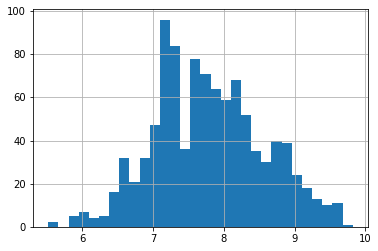

In [13]:
credit_amount = 'Credit amount'
duration = 'Duration'
df[credit_amount] = np.log(df[credit_amount])
df[credit_amount].hist(bins=30);


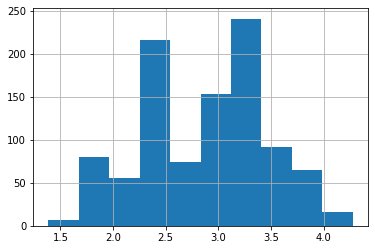

In [14]:
df[duration] = np.log(df[duration])
df[duration].hist();

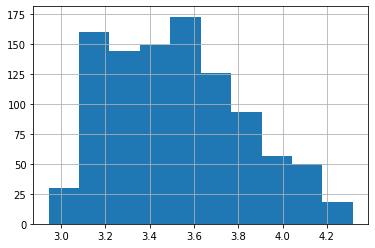

In [15]:
df['Age'] = np.log(df['Age'])
df['Age'].hist();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c81f630>,
      dtype=object)

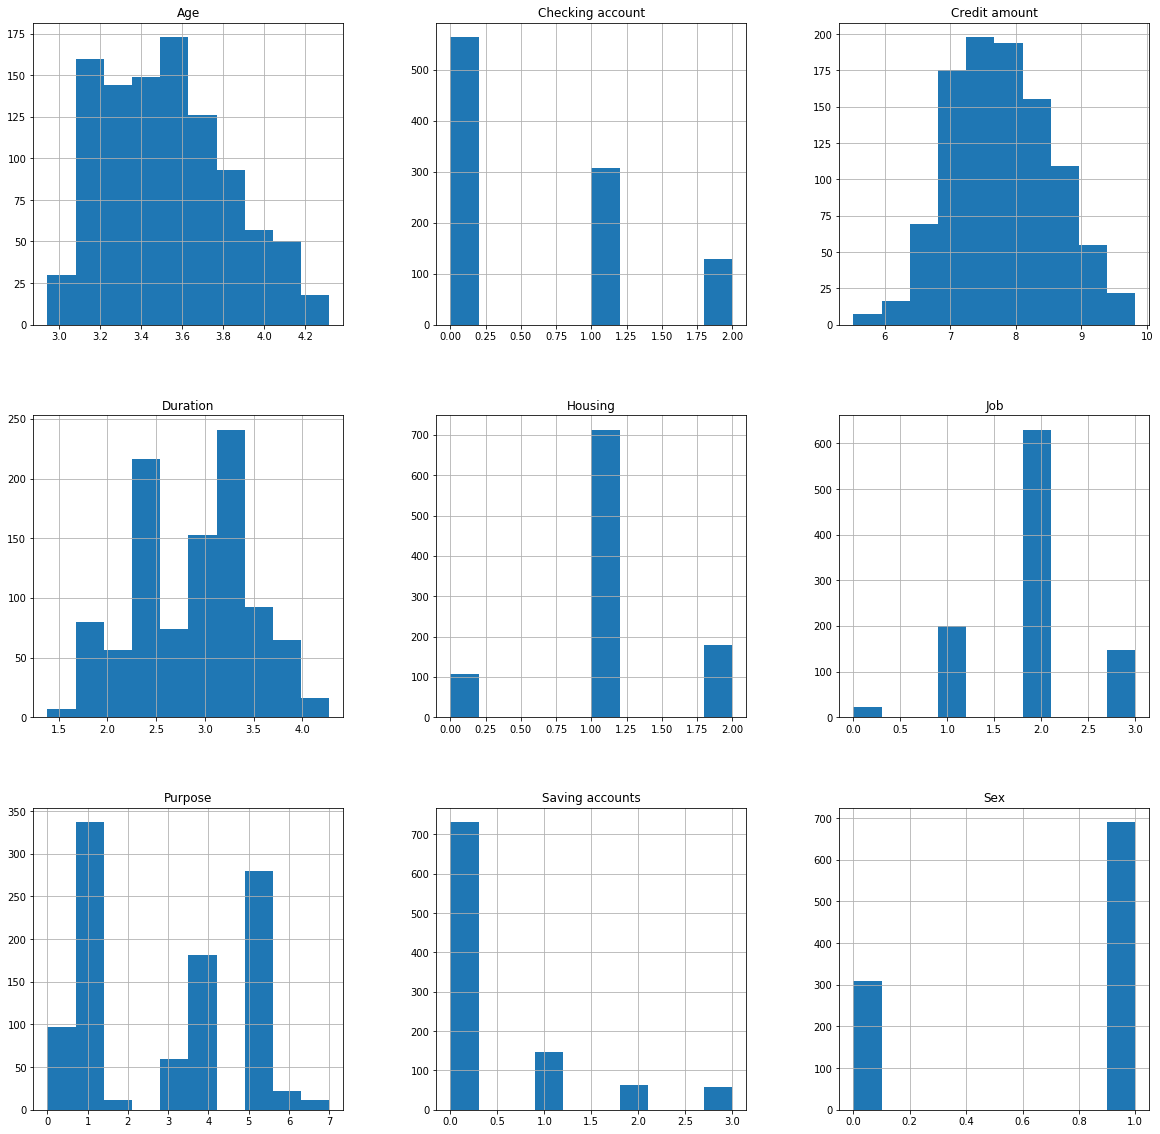

In [16]:
df.hist(figsize=(20,20))

In [17]:
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

In [18]:
from sklearn.decomposition import PCA

df_cluster = df[continuous]

scaler = StandardScaler()

df_cluster = scaler.fit_transform(df_cluster)

pca = PCA()
pca.fit(df_cluster)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

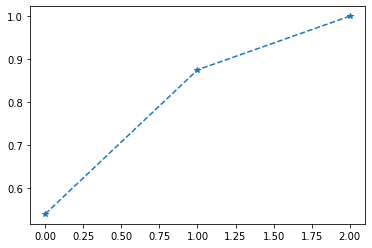

In [19]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '*--');

In [20]:
df_new = PCA(n_components=2).fit_transform(df_cluster)
df_new.shape

(1000, 2)

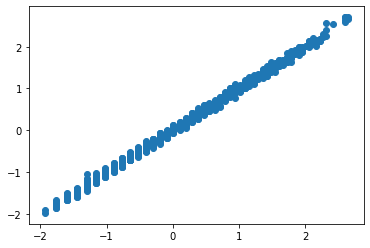

In [21]:
plt.scatter(df_cluster[:, 0], df_new[:, 1]);

In [ ]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=4, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(df_cluster)

In [ ]:
df_cluster.head()

In [ ]:
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    s=150,
    palette="Set2",
    legend='full'
)

In [ ]:
from sklearn.cluster import KMeans
clusters_num = [2,3,4,5,6,7,8,9]
inertias =[]

for n in clusters_num:
    kmeans = KMeans(n_clusters=n, random_state=0).fit(df_cluster)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_num,inertias, marker='o')

In [ ]:

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
              init = 'k-means++',
              max_iter = 300,
              n_init = 10,
              random_state = 42)
    km.fit(df_cluster)
    labels = km.labels_
    wcss.append(km.inertia_)
    
plt.rcParams['figure.figsize'] = (15, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
inertia = []
k = range(2, 12)
for k_i in k:
    km = KMeans(n_clusters=k_i).fit(df_cluster)
    km.fit(df_cluster)
    inertia.append(silhouette_score(df_cluster, km.labels_))

print(inertia)
    
plt.plot(k, inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The silhouette showing the optimal k')

In [ ]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = hierarchy.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [ ]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

# # https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
distance_mat = pdist(df_cluster) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'ward') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(20, 10))
dn = fancy_dendrogram(
    Z,
    leaf_font_size=8.,
    max_d=13,
    leaf_rotation=90.,
    truncate_mode='lastp',
    p=12,
    show_contracted=True,
    annotate_above=10
)